# Dall' analogico al digitale

**Informazioni generali.** Misure dello spettro di assorbimento di Powerade blu

Dettagli del setup:
* BS170 
* AD2 per l'acquisizione dati
* 

## Caratteristiche del BS107

$Piedinatura$


Vpinch off

$V_{thr} = 1V-3V$ 

## Progettazione di massima del circuito

misura $R1 = 994.6 \pm 3.9 \mathrm{\Omega}$

Alimentando a $V_{DD} = 5V$ ci aspettiamo che $Q_1$ conduca molto e cortocircuiti con l uscita a terra, quindi la corrente che ci aspettiamo è data solo dalla caduta di potenziale lungo $R1$, quindi $I_D = \mathrm{\frac{5V}{1k\Omega}\sim5mA}$ 



 All interno di "caratteristiche" spaziamo da 1.2-2 (in Vgs)con salti di 0.1V

 In caratteristiche ci sono file che spazzano da Vgs 1.2 a 2 con scarti di 0.1, in ogni file spazzata Vds da 0 a 5

 all interno della cartella caratteristiche ogni valore vgs h atre copie
 quindi 001, 002, 003 sono tutte misure di 1.2V   












0


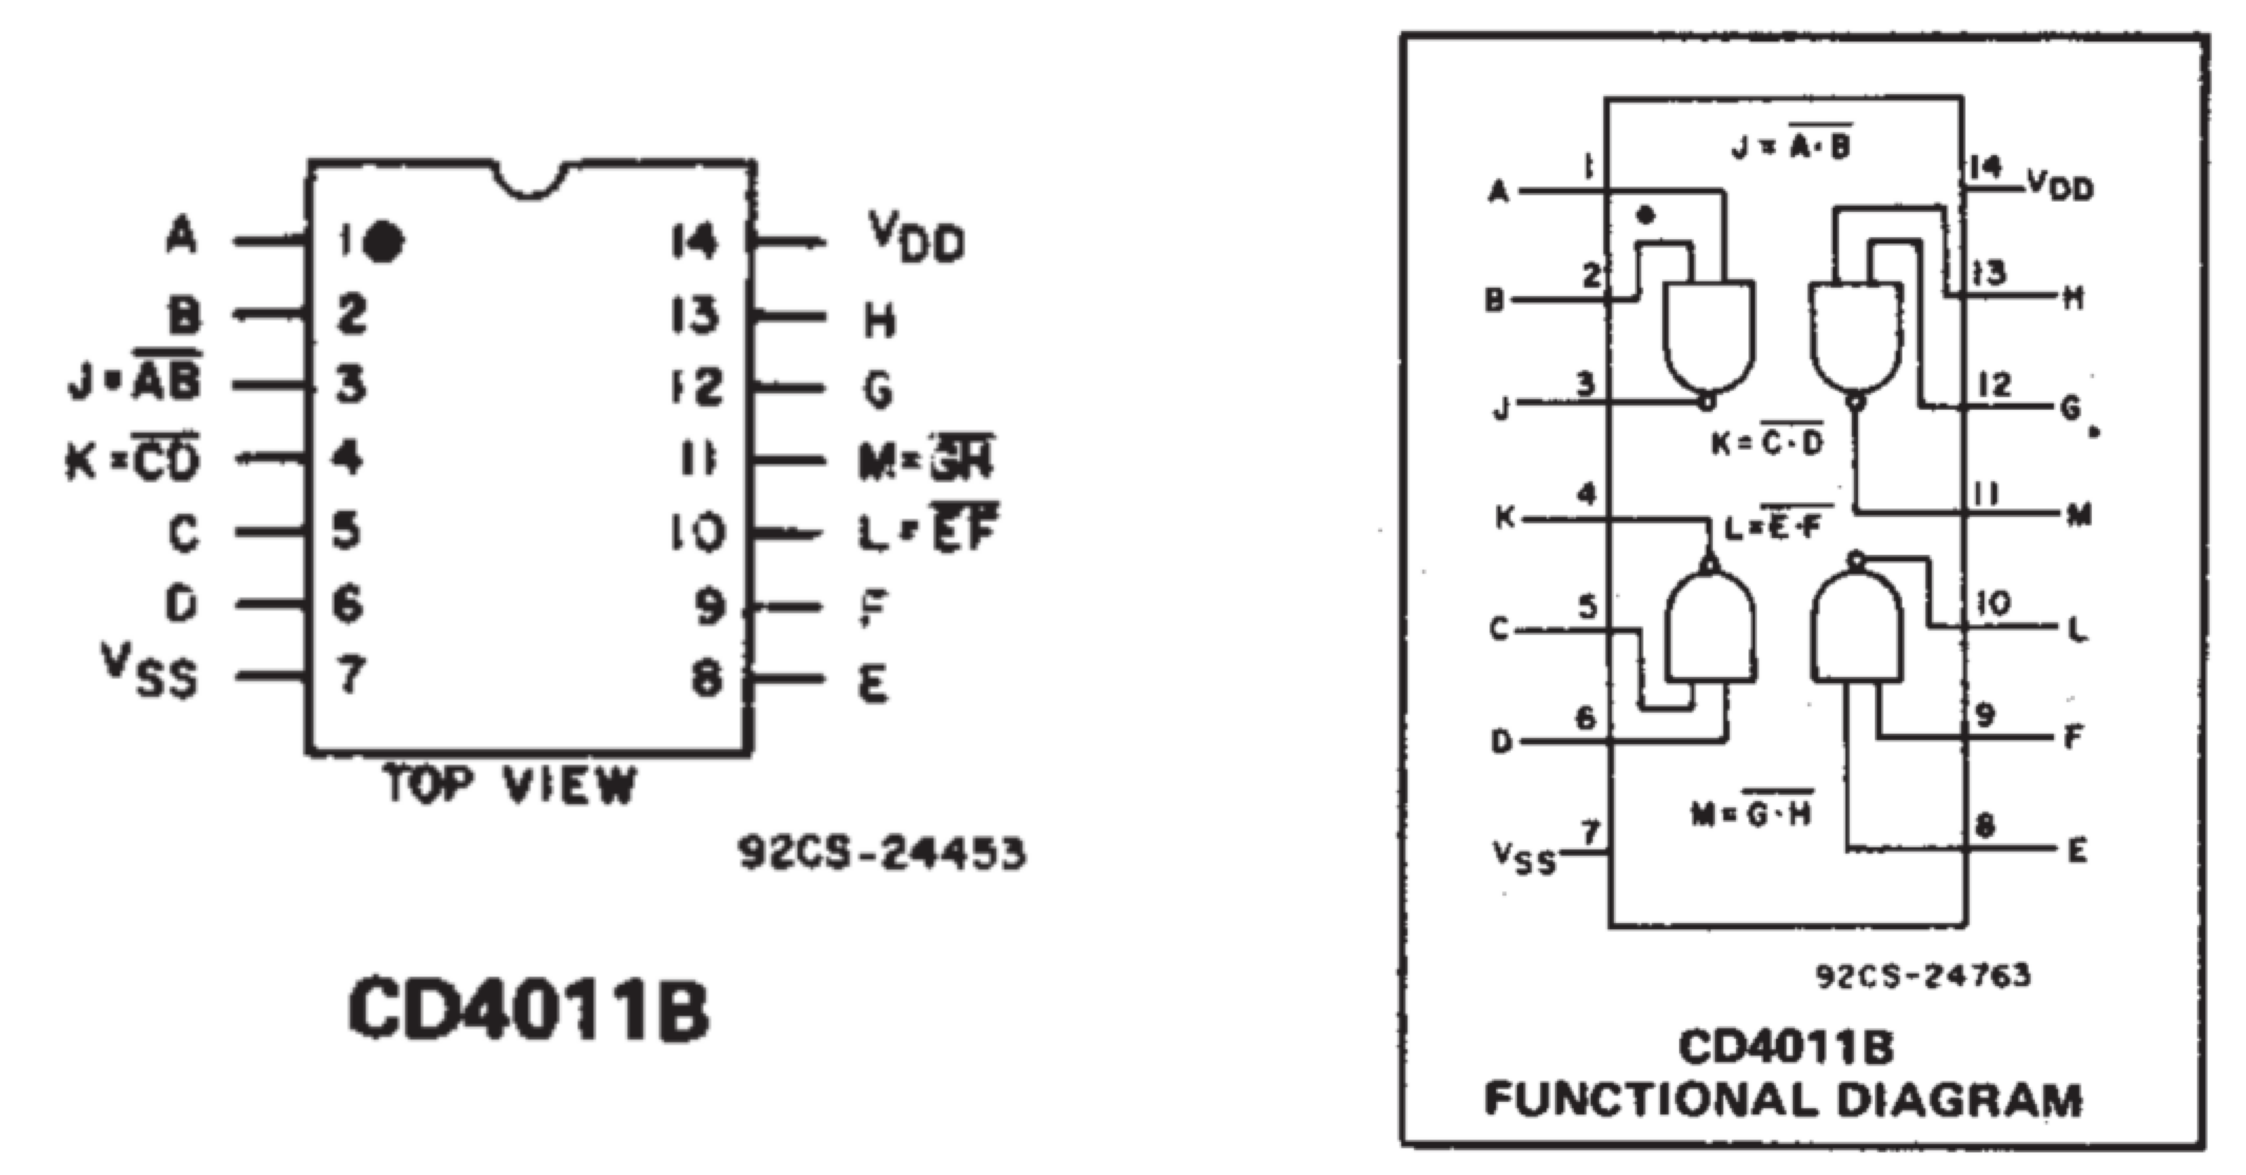

In [ ]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            try:
                axes[i].imshow(imgList[i])
                axes[i].axis('off')
            except:
                pass
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/piedini_belli.png]
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


In [ ]:
pdfList = ['Media/piedini_belli.png', 'Media/piedini_brutti.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Il voltaggio di alimentazione va da 3V a 18V, compatibile con le specifiche di ad2 riducendoci all intervallo 0V-5V
 R1 = 9.973kOhm (task 5)
 
 



0


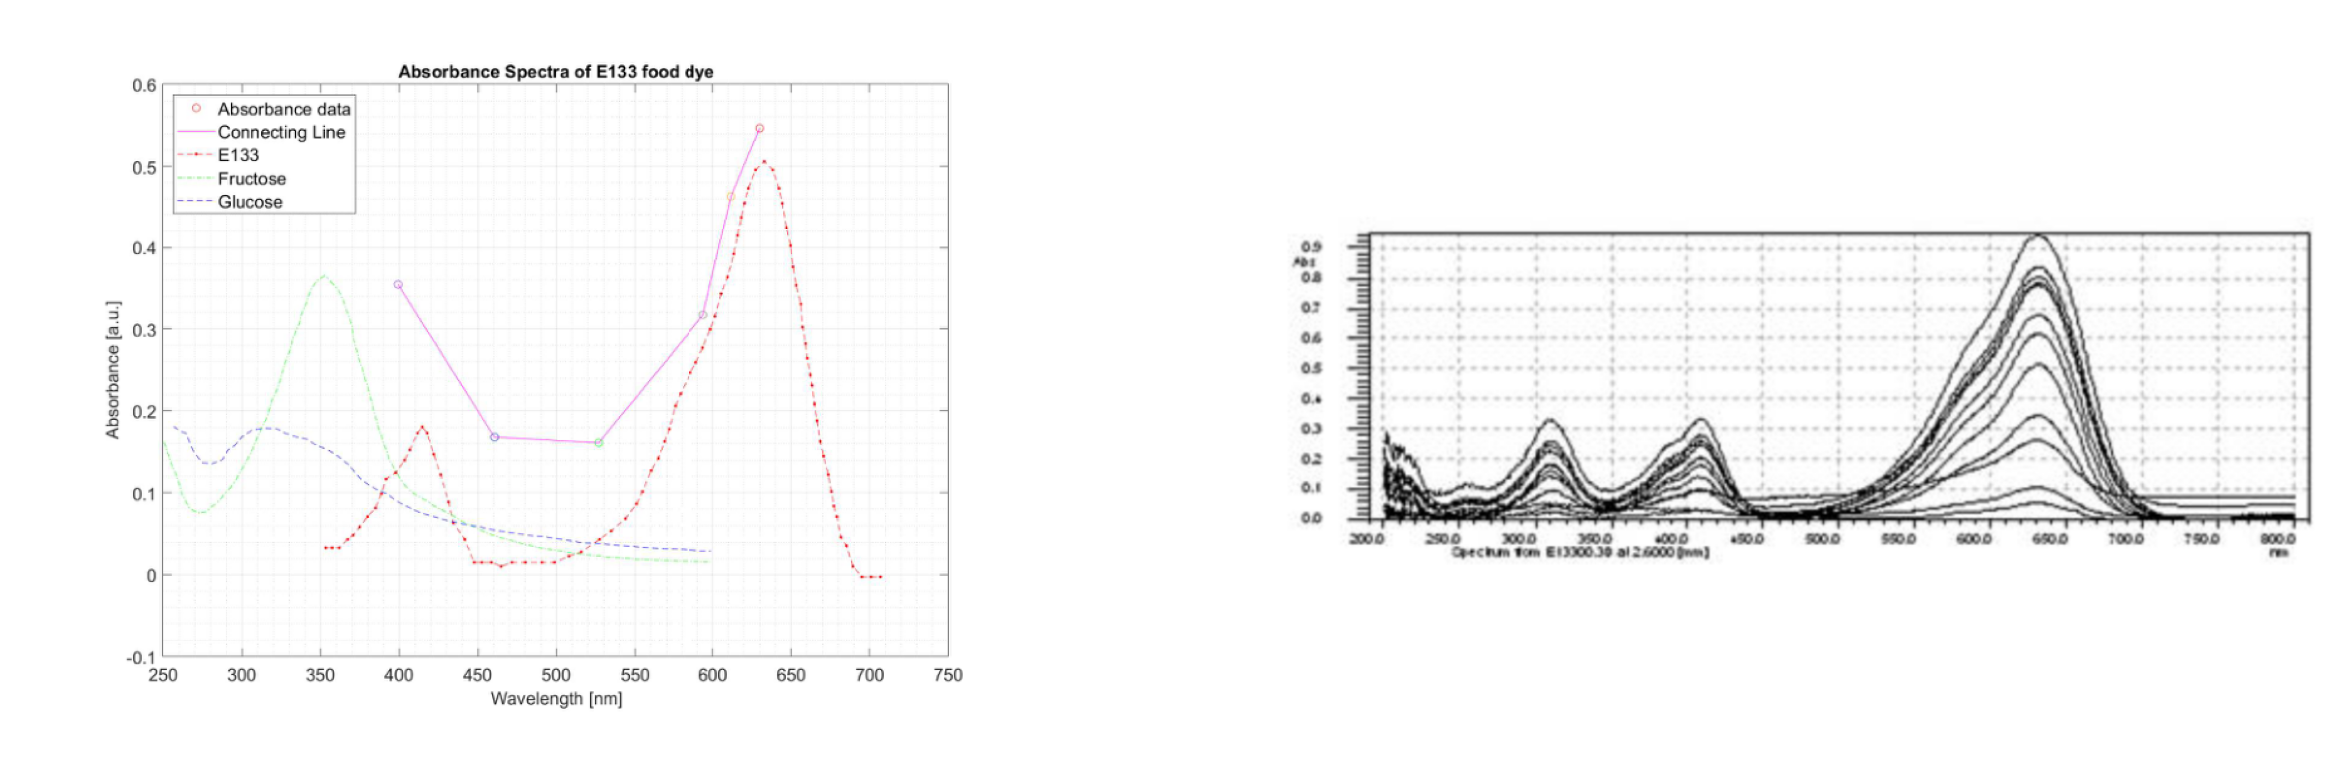

In [ ]:
pdfList = ['Media/MisuraContinua.pdf', 'Media/E133_spettroLargo.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)